In [18]:
# Import necessary libraries and packages
import os
import zipfile
import numpy as np
import pandas as pd

from skimage import io
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

import requests
from PIL import Image
from io import BytesIO
import cv2

import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

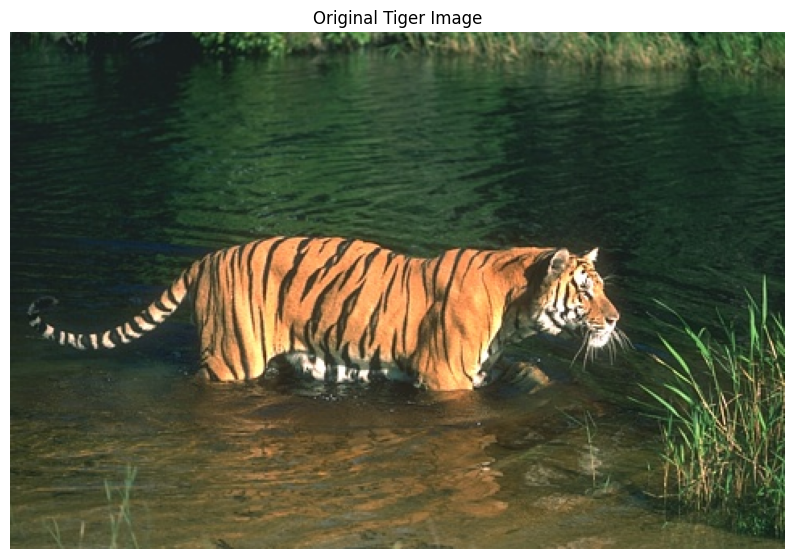

Image shape: (321, 481, 3)
Data type: uint8


In [11]:
# Load the tiger image
tiger_path = "../data/bsds500/tiger_108073.jpg"

# Read and display the tiger image
tiger_img = plt.imread(tiger_path)
plt.figure(figsize=(10, 8))
plt.imshow(tiger_img)
plt.title("Original Tiger Image")
plt.axis('off')
plt.show()

print(f"Image shape: {tiger_img.shape}")
print(f"Data type: {tiger_img.dtype}")

In [21]:
# Function of K-Means segmentation
def segment_image_with_kmeans(image, k, title=None, output_dir="outputs",
                              sample_pixels=10_000, random_state=0):
    """
    Segment an RGB image with k‑means clustering.
    
    Parameters
    ----------
    image : ndarray (H, W, 3)  uint8  0‑255
    k     : int                Number of clusters
    title : str, optional      Figure / suptitle text
    output_dir : str           Folder where PNGs are saved
    sample_pixels : int        Sub‑sample size for fitting k‑means
    random_state : int         Reproducibility seed
    """
    # 1) Reshape to a list of pixels
    h, w, d = image.shape
    image_array = image.reshape(-1, d)

    # 2) Sub-sampling to speed up K-Means
    if len(image_array) > sample_pixels:
        image_sample = shuffle(image_array, random_state=random_state)[:sample_pixels]
    else:
        image_sample = image_array

    # 3) Fit K-Means
    print(f"Applying k‑means with k={k} on {len(image_sample):,} pixels …")
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=random_state)
    kmeans.fit(image_sample)

    # 4) Predict labels for every pixel
    cluster_labels = kmeans.predict(image_array)
    segmented_array = kmeans.cluster_centers_[cluster_labels]

    # Cast to uint8 so 0‑255 values display correctly
    segmented_image = segmented_array.reshape(h, w, d).astype(np.uint8)

    # 5) Visualize
    if title:
        plt.figure(figsize=(15, 7))
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(segmented_image)
        plt.title(f"Segmented Image (k={k})")
        plt.axis("off")

        plt.suptitle(title)
        plt.tight_layout()
        plt.show()

    # Save
    os.makedirs(output_dir, exist_ok=True)
    file_root = title.lower().replace(" ", "_") if title else "segmented"
    save_path = os.path.join("../outputs", f"{file_root}_k{k}.png")
    plt.imsave(save_path, segmented_image)
    print(f"Saved → {save_path}")

    return segmented_image

Applying k‑means with k=2 on 10,000 pixels …


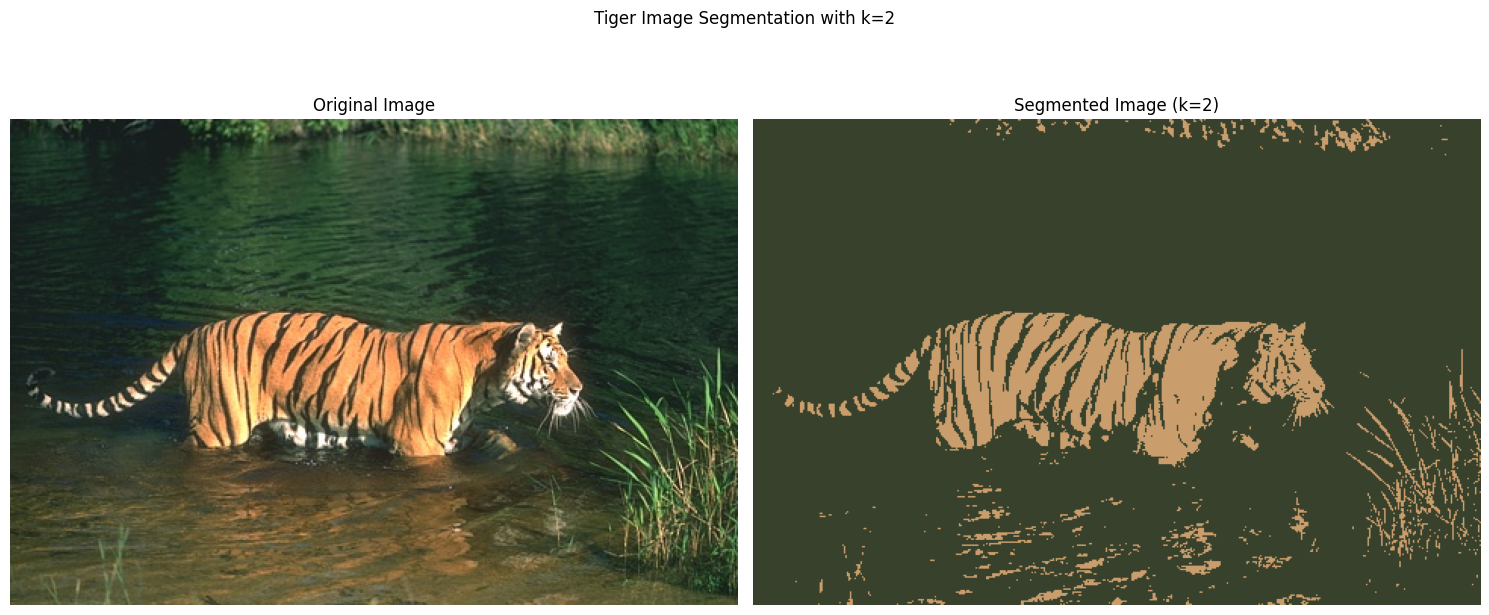

Saved → outputs/tiger_image_segmentation_with_k=2_k2.png
Applying k‑means with k=3 on 10,000 pixels …


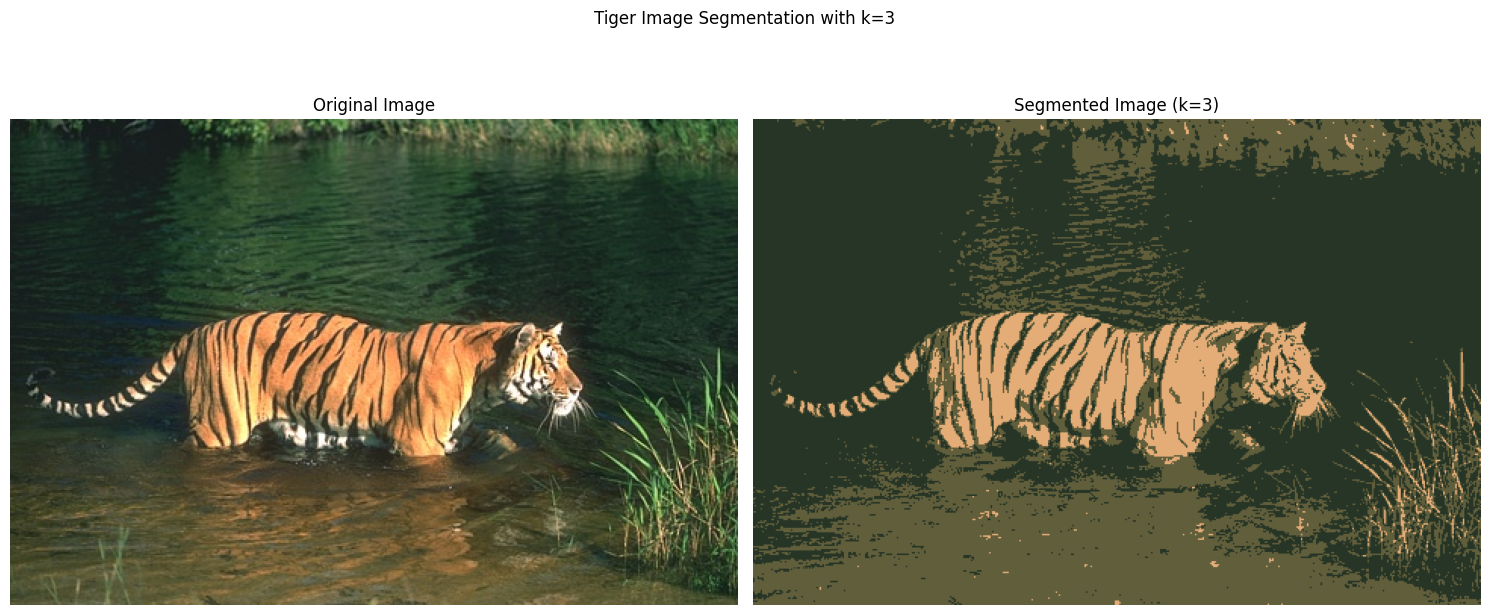

Saved → outputs/tiger_image_segmentation_with_k=3_k3.png
Applying k‑means with k=5 on 10,000 pixels …


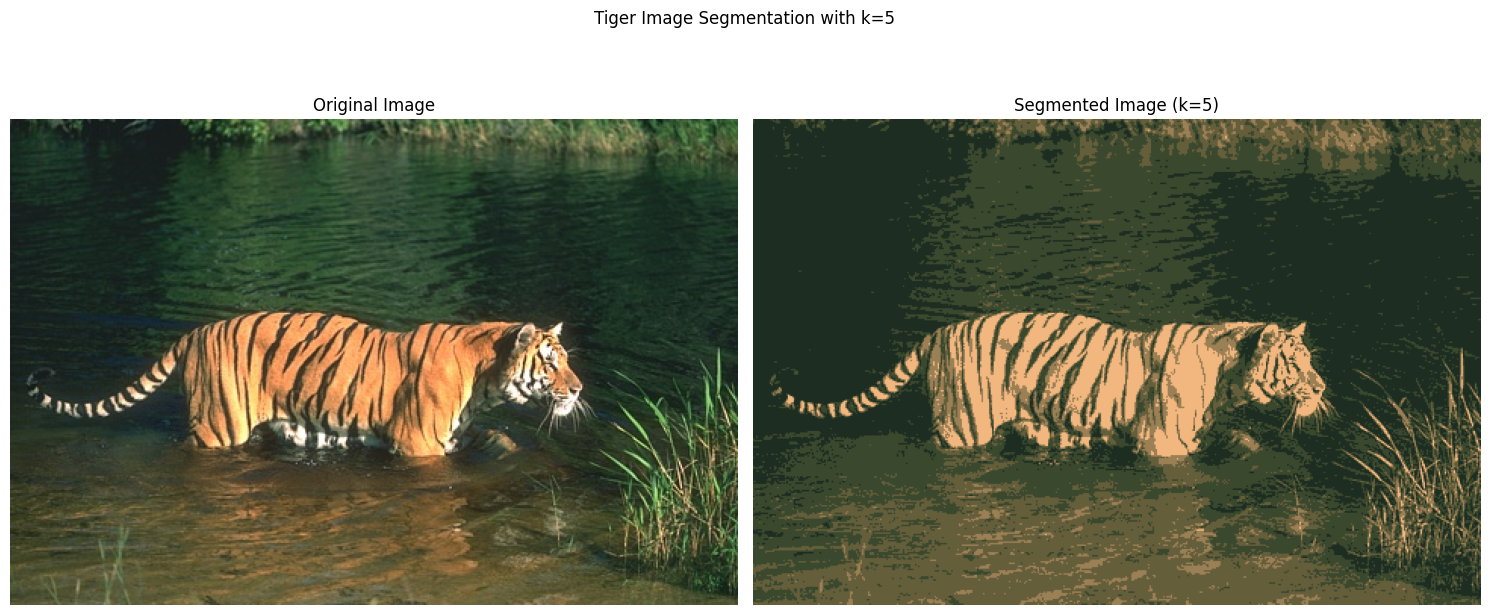

Saved → outputs/tiger_image_segmentation_with_k=5_k5.png


In [17]:
# Apply k-means with different k values to the tiger image
k_values = [2, 3, 5]
segmented_images = {}

for k in k_values:
    segmented = segment_image_with_kmeans(
        tiger_img,               # still your uint8 image
        k=k,
        title=f"Tiger Image Segmentation with k={k}"
    )
    segmented_images[k] = segmented

In [19]:
# Load the airplane image
airplane_img = io.imread("../data/bsds500/airplane.jpg") 

# Sanity check verification
print(airplane_img.shape, airplane_img.dtype)             

(321, 481, 3) uint8


Applying k‑means with k=2 on 10,000 pixels …


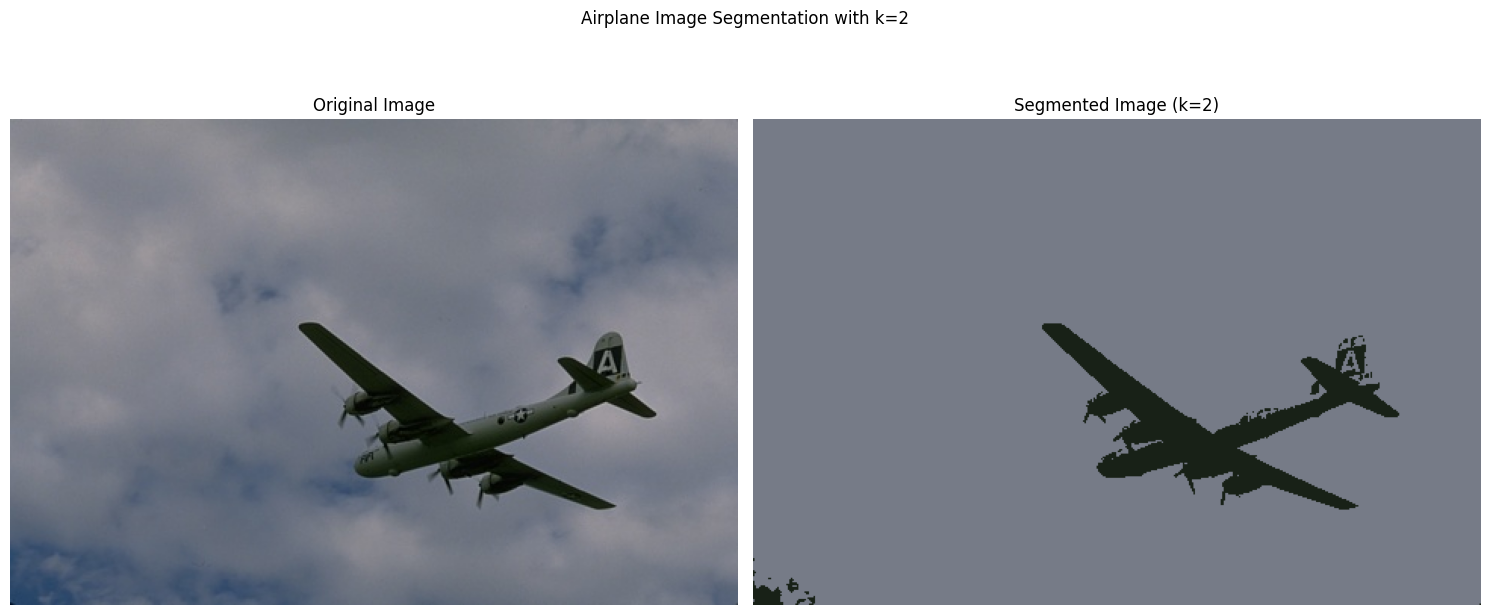

Saved → ../outputs/airplane_image_segmentation_with_k=2_k2.png
Applying k‑means with k=3 on 10,000 pixels …


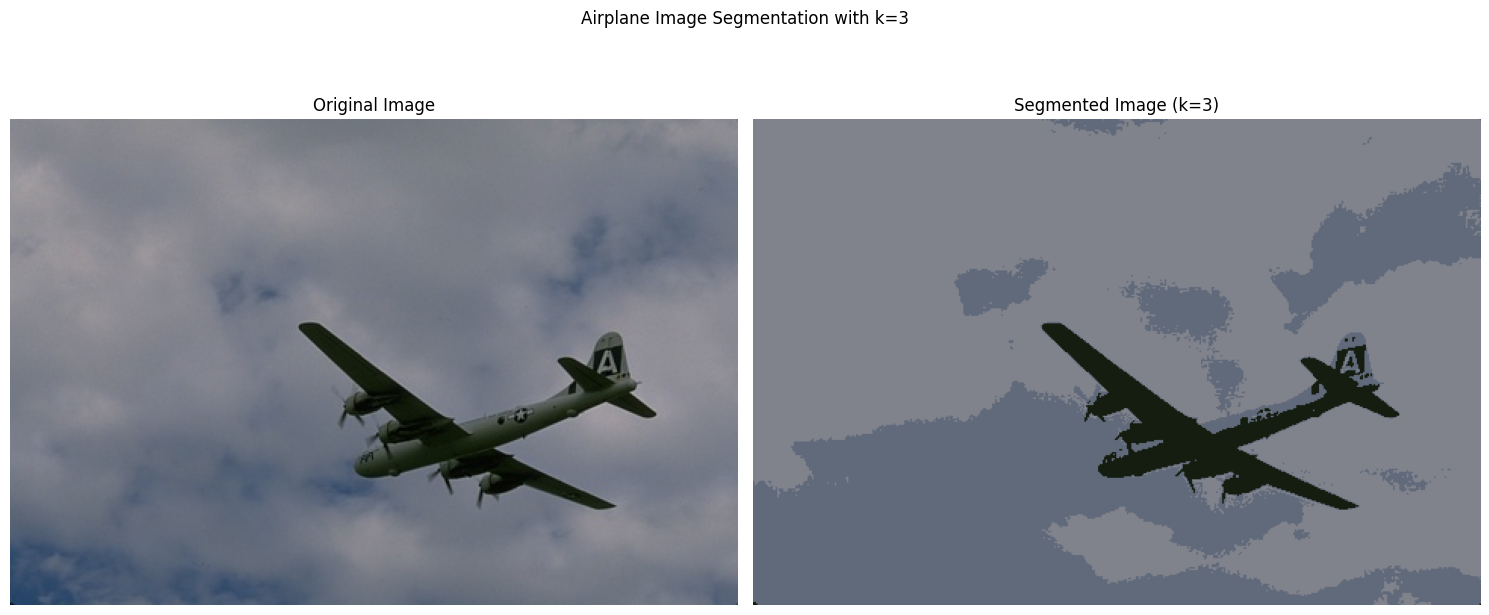

Saved → ../outputs/airplane_image_segmentation_with_k=3_k3.png
Applying k‑means with k=5 on 10,000 pixels …


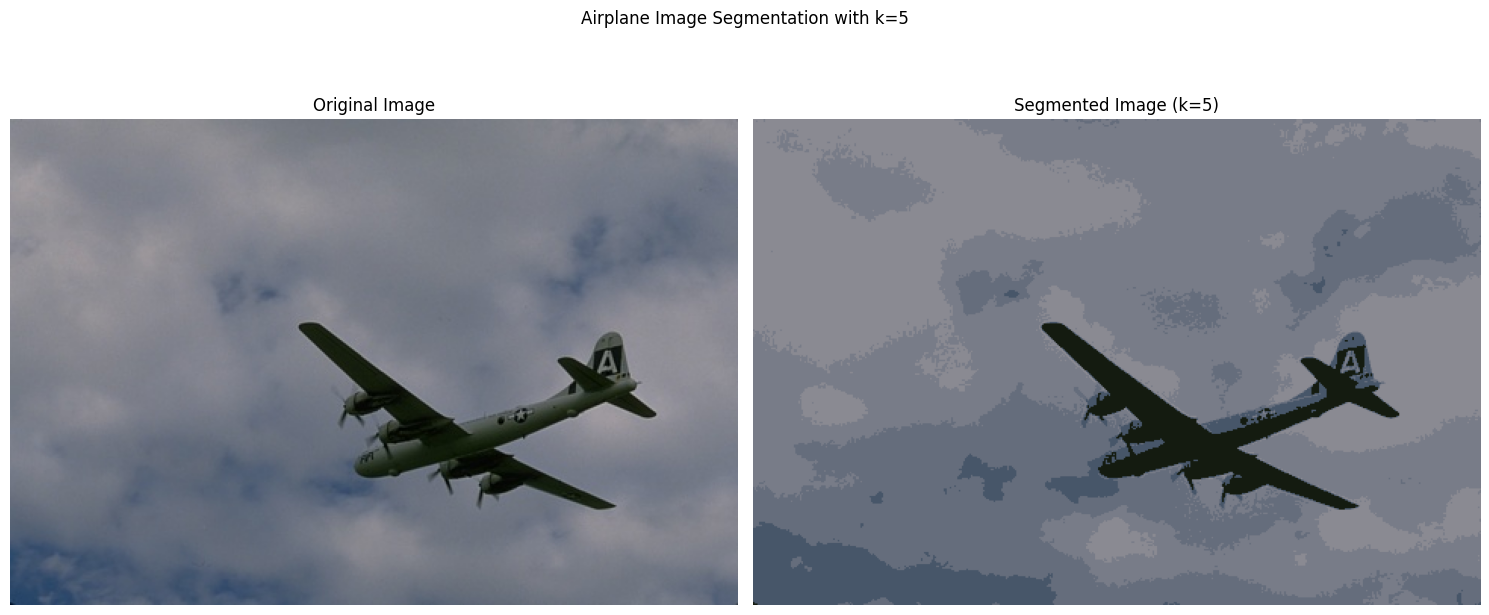

Saved → ../outputs/airplane_image_segmentation_with_k=5_k5.png


In [22]:
# Apply k-means with different k values to the airplane image
k_values = [2, 3, 5]

for k in k_values:
    segment_image_with_kmeans(
        airplane_img,
        k=k,
        title=f"Airplane Image Segmentation with k={k}"
    )